# Part II - Factors Affecting BorrowerRate on Loans  
## by Halima Nasula Merenga 

## Investigation Overview

>In this investigation, I wanted to look at the factors affecting Borrower Rate, specifically credit score, loan term , employment status duration and DTI ratio

## Dataset Overview

> This data set contains 113,937 loans with 81 variables, which has been cut down to 93510 rows and 19 columns after preliminary wrangling. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loandata=pd.read_csv('prosperLoanData.csv')

In [3]:
# filter the dataframe and give it a new name
df_loans = loandata.loc[:, [ 'Term', 'LoanStatus', 'BorrowerAPR',
                         'BorrowerRate', 'LenderYield', 'ListingCategory (numeric)',
                         'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
                         'DebtToIncomeRatio','IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome',
                         'LoanOriginalAmount', 'LoanOriginationDate', 
                         'MonthlyLoanPayment','Investors']]

In [4]:
#removing duplicate data
df_loans.drop_duplicates(inplace=True)

In [5]:
#removing null data 

df_loans=df_loans.dropna()

In [6]:
#credit score function
def Credit_score(x):
    outcome=""
    if x >= 300 :
        outcome = "Poor"
    if x>=550:
        outcome = "Fair"
    if x>=650:
        outcome = "Good"
    if x>=750:
        outcome = "Excellent"
    return outcome

In [7]:
#applying credit function
df_loans['CreditScore'] = df_loans['CreditScoreRangeLower'].apply(Credit_score)

In [8]:
# Drop the redundant columns
cols = ['CreditScoreRangeLower','CreditScoreRangeUpper']
df_loans.drop(columns=cols , axis=1 , inplace=True)

In [9]:
#replacing the 3 value counts with string 
df_loans.replace(to_replace={"Term": {12: "Short", 36: "Intermediate", 60: "Long"}}, inplace=True)

In [10]:
# Convert Credit Score, IncomeRange and Term to ordinal categorical
ordinal_var_dict = {'Term': ['Short','Intermediate','Long'],
                    'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'], 
                    'CreditScore': ['Poor','Fair','Good', 'Excellent']}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df_loans[var] = df_loans[var].astype(ordered_var)

In [11]:
#removing debt to income ratio outliers 
#make a copy of the original dataset
new_loans=df_loans.copy()

In [12]:
# Select outliers in debt to income ratio with ratio greater than 1.
outliers_dti = (new_loans['DebtToIncomeRatio']>1) 
out_df = new_loans.loc[outliers_dti,:]

In [13]:
#removing outlier data
filter_df = new_loans.loc[-outliers_dti,:]

## Distribution of Borrower Rate  

> The BorrowerRate is the The Borrower's interest rate for this loan. The histogram can be said to be bimodal with 1 peak at around 0.15 and the other at around 0.32. It is slightly right skewed with a sudden steep increase at around 0.32

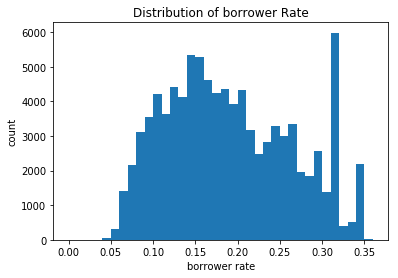

In [14]:

bins = np.arange(0,df_loans['BorrowerRate'].max()+0.01,0.01) 
plt.hist(x='BorrowerRate',data=df_loans,bins=bins)
plt.title('Distribution of borrower Rate')
plt.xlabel('borrower rate')
plt.ylabel('count');

## Borrower Rate against Credit Score 

> Plotting a box plot for the categorical credit score data against the Borrower Rate, we see an inverse correlation between the two. For poor credit score, the borrowerRate is highest while for the excellent credit score, the Borrower Rate is lowest. 

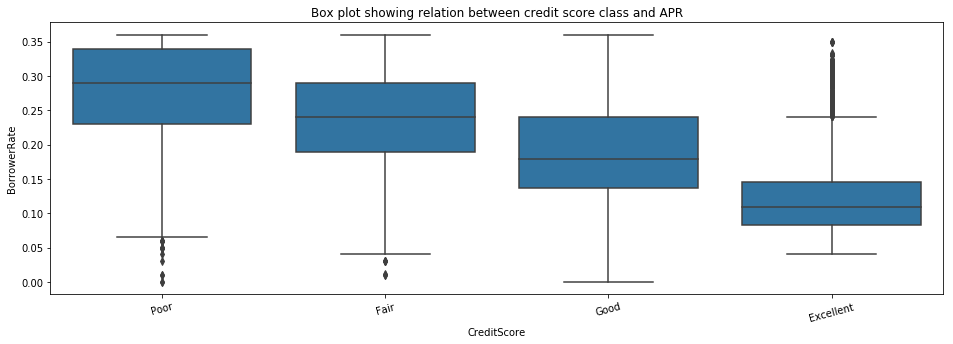

In [15]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data=filter_df, x='CreditScore', y='BorrowerRate', color=base_color)
plt.xticks(rotation=15);
plt.title('Box plot showing relation between credit score class and APR');

### Borrower Rate Vs. Loan Term 
> The loan interest is highest for Long Term Loans and Lowest for short term goals. This is possibly because shorter terms guarantee the lender will have their money back sooner, so there’s less risk. 



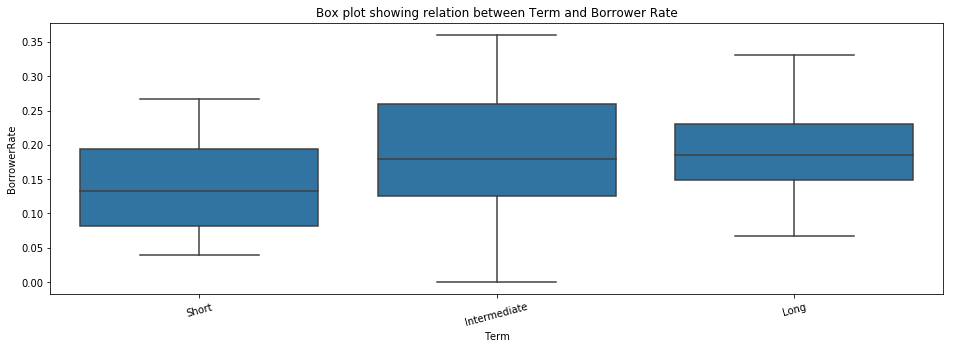

In [16]:
plt.figure(figsize = [16, 5])
sb.boxplot(data=filter_df, x='Term', y='BorrowerRate', color=base_color)
plt.xticks(rotation=15); 
plt.title('Box plot showing relation between Term and Borrower Rate');

### Borrower Rate Against Employment Status Duration 
> Within a 60 months period we observe that for those who have been employed for less than 15 months, most of them get loans with high Borrowe Rate of above 0.30 . For those who have been employed for less than 30 months but mote than 15, their Borrower Rate can be seen to be mostly at 0.15

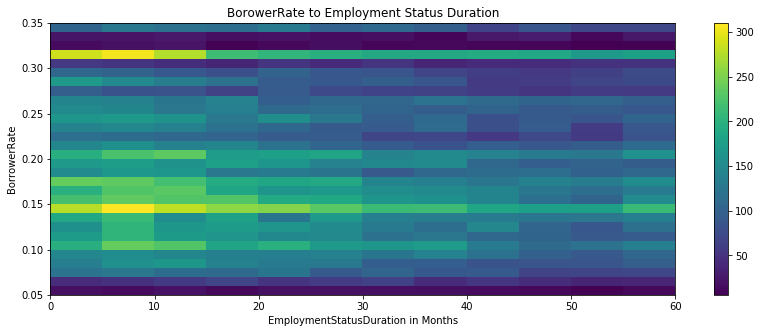

In [17]:
plt.figure(figsize = [14, 5])
bins_x = np.arange(0, 60+5, 5)
bins_y = np.arange(0.05,0.36, 0.01)
plt.hist2d(data= filter_df, x = 'EmploymentStatusDuration', y = 'BorrowerRate', cmap= 'viridis', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('EmploymentStatusDuration in Months')
plt.ylabel('BorrowerRate');
plt.title('BorowerRate to Employment Status Duration');

### BorrowerRate Against Debt-to-Income Ratio
> For those whose debt to income ratio is below 0.3, the borrower rate is low. This means that if your DTI ratio is low, your loan is likely to have a low borrowerrate

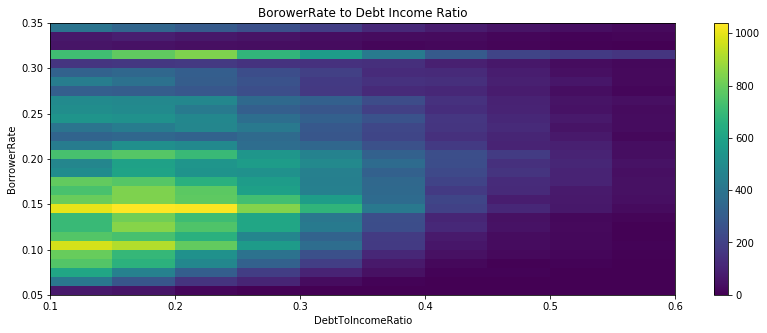

In [18]:
plt.figure(figsize = [14, 5])
bins_x = np.arange(0.1, 0.6+0.05, 0.05)
bins_y = np.arange(0.05,0.36, 0.01)
plt.hist2d(data= filter_df, x = 'DebtToIncomeRatio', y = 'BorrowerRate', cmap= 'viridis', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('BorrowerRate');
plt.title('BorowerRate to Debt Income Ratio');

### Borrower Rate against Credit Score for each loan Term 
> Across all credit score groups, the Long term loans have the highest BorrowerRate  while the BorrowerRate is lowest in each credit score group when the loan term is short

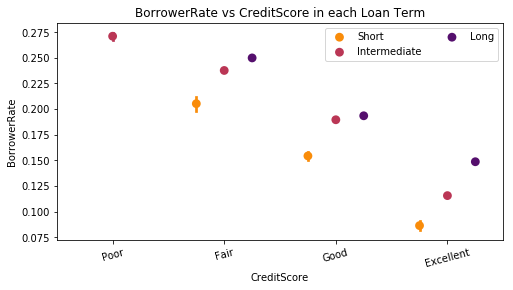

In [19]:
# Creditscore vs BorrowerAPR in each LoanStatus
fig = plt.figure(figsize = [8,4])
ax = sb.pointplot(data = filter_df, x = 'CreditScore', y = 'BorrowerRate', hue = 'Term', linestyles = "",
                  dodge = 0.5, palette = 'inferno_r')
plt.title('BorrowerRate vs CreditScore in each Loan Term')
plt.ylabel('BorrowerRate')
plt.xticks(rotation=15)
plt.legend(ncol=2)
plt.show();